<h2 align=center> Diabets Diagnosis</h2>

---

### 1. Loading Libraries and Data.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# We import warnings to ignore warnings that could occur while using seaborn or matplotlib.

import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('diabets.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### 2. Examining Data.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 3. Examining Target Column.

Number Of people has diabets 500
Number of people don't have diabets 268


<AxesSubplot:xlabel='Outcome', ylabel='count'>

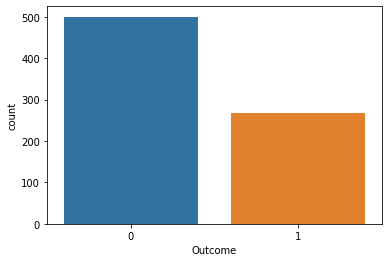

In [6]:
Tru, Fals = data.Outcome.value_counts()
print('Number Of people has diabets' , Tru)
print("Number of people don't have diabets" , Fals)

sns.countplot(data.Outcome , label = 'Count')

#from the plot we could see that there is no Equality in Target column values.

### 4. Applying Explanatory Data Analysis and Data VisualizationApplying.

<AxesSubplot:>

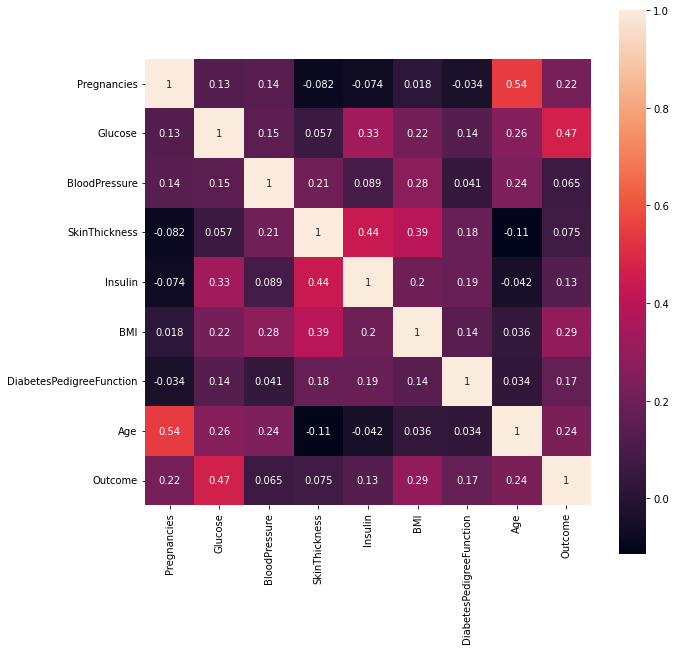

In [7]:
corr = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , annot = True, square= True)

<AxesSubplot:title={'center':'Relationship between Age and Insulin levels'}, xlabel='Age', ylabel='Insulin'>

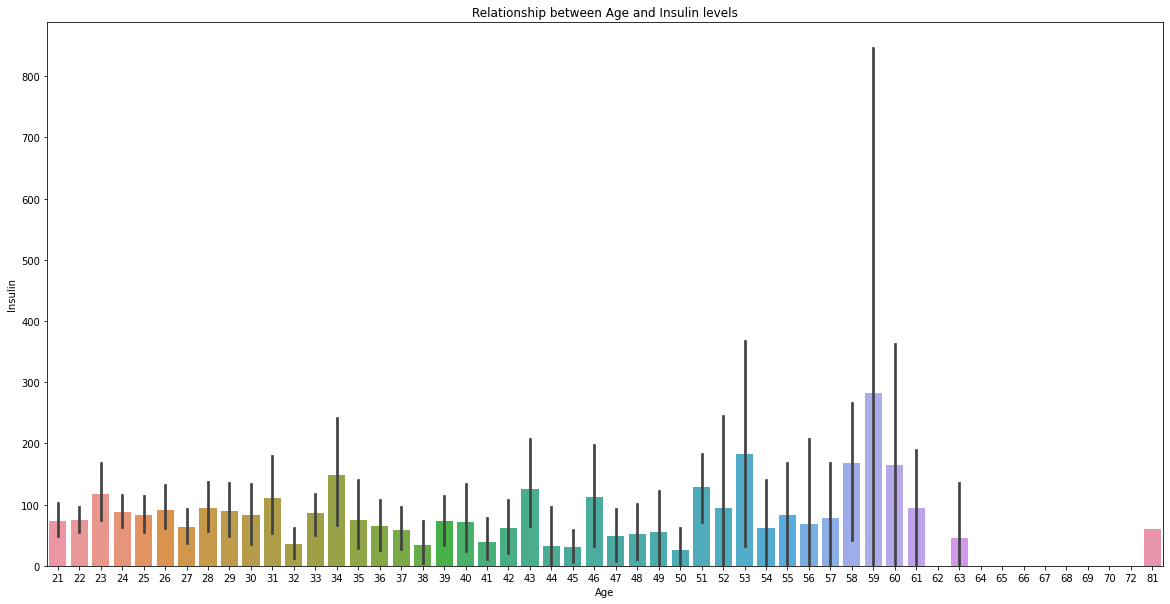

In [8]:
plt.figure(figsize=(20,10))
plt.title("Relationship between Age and Insulin levels")
sns.barplot(x = 'Age' , y = 'Insulin', data = data)

<AxesSubplot:title={'center':'Relationship between Age and Glucose'}, xlabel='Age', ylabel='Glucose'>

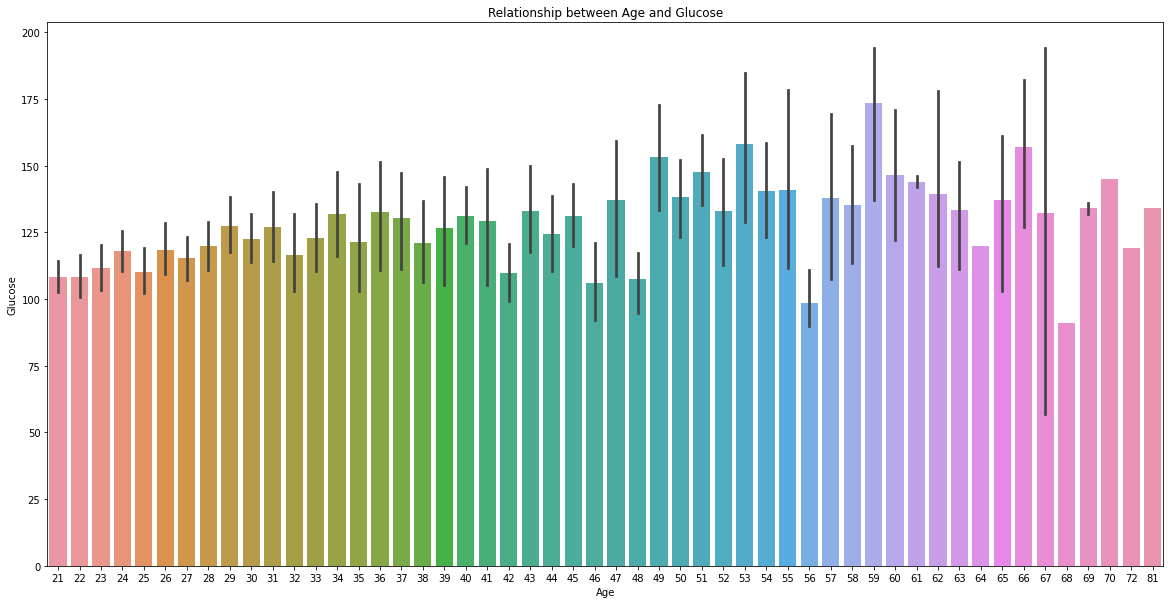

In [9]:
plt.figure(figsize=(20,10))
plt.title("Relationship between Age and Glucose")
sns.barplot(x = 'Age' , y = 'Glucose', data = data)

In [10]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


### 5. Separate our Data to Create Features DataFrame and  Target DataFrame.

In [11]:
X = data.drop(['Outcome'], axis = 1)
y = data.Outcome

### 6. After EDA the Valuse are not Consistent and there is a Large Gap so we Need to Standarize our Data.

In [12]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
data_std = std.fit_transform(data)
data_std

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.46849198,
         1.4259954 ,  1.36589591],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.36506078,
        -0.19067191, -0.73212021],
       [ 1.23388019,  1.94372388, -0.26394125, ...,  0.60439732,
        -0.10558415,  1.36589591],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.68519336,
        -0.27575966, -0.73212021],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.37110101,
         1.17073215,  1.36589591],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.47378505,
        -0.87137393, -0.73212021]])

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(X,y, random_state = 200)

### 7. Testing our Data Model Using  eXtreme Gradient Boosing , Logistic Regression and Random Forest.  


In [14]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
model = XGBClassifier(n_estimators=150)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy_score(y_test, predictions)

0.7760416666666666

In [16]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy_score(y_test, predictions)

0.8333333333333334

In [17]:
model = RandomForestClassifier(n_estimators=250)
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy_score(y_test, predictions)

0.8020833333333334

<h2 align=center> Using EDA and Feature Engineering, We got a High Accuracy: 83%.</h2>
